In [18]:
import pandas as pd
import numpy as np

# Generate random data for house features
num_rows = 100

# Size (in square feet)
size = np.random.randint(800, 3000, size=num_rows)

# Number of Rooms
num_rooms = np.random.randint(1, 6, size=num_rows)

# Location (categorical - A, B, C)
location = np.random.choice(['A', 'B', 'C'], size=num_rows)

# Price (dependent on size and number of rooms)
price = 50000 + 150 * size + 20000 * num_rooms + np.random.normal(0, 10000, size=num_rows)

# Create a pandas DataFrame
data = pd.DataFrame({'Size': size, 'Number of Rooms': num_rooms, 'Location': location, 'Price': price})

# Save the dataset to a CSV file
data.to_csv('house_prices.csv', index=False)

print("Dataset created and saved as 'house_prices.csv'")

Dataset created and saved as 'house_prices.csv'


In [19]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Generate random data for house features (If data is not already loaded)
num_rows = 100

# Size (in square feet)
size = np.random.randint(800, 3000, size=num_rows)

# Number of Rooms
num_rooms = np.random.randint(1, 6, size=num_rows)

# Location (categorical - A, B, C)
location = np.random.choice(['A', 'B', 'C'], size=num_rows)

# Price (dependent on size and number of rooms)
price = 50000 + 150 * size + 20000 * num_rooms + np.random.normal(0, 10000, size=num_rows)

# Create a pandas DataFrame
data = pd.DataFrame({'Size': size, 'Number of Rooms': num_rooms, 'Location': location, 'Price': price})

# Normalize numerical features
scaler = MinMaxScaler()
numerical_features = ['Size', 'Number of Rooms']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Perform one-hot encoding and concatenation before dropping the 'Location' column
encoded_location = encoder.fit_transform(data[['Location']])
encoded_location_df = pd.DataFrame(encoded_location, columns=encoder.get_feature_names_out(['Location']))
data = pd.concat([data, encoded_location_df], axis=1)

# Dropping 'Location' after it has been used for one-hot encoding
data = data.drop('Location', axis=1)

# Separate features (X) and target (y)
X = data.drop('Price', axis=1)
y = data['Price']

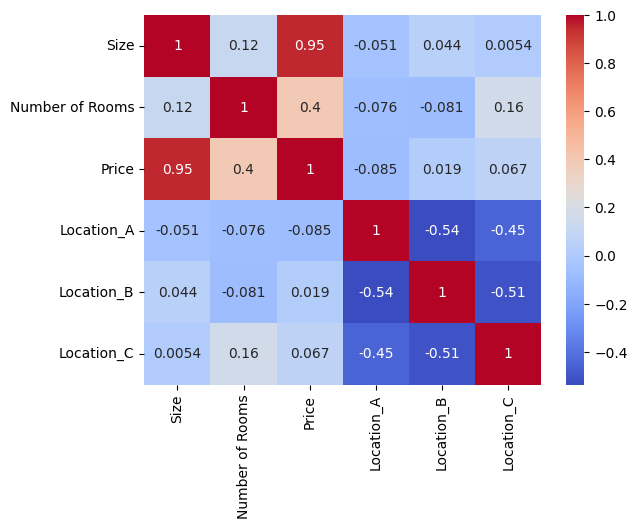

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 12614.157443075734
R-squared: 0.9837191502896095
